#### **Section 1: Data Loading**

In [1]:
#1.1 Data Loading
import random
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score

# Set random seeds for reproducibility
random.seed(42)
df = pd.read_csv('F:\Abdillah\LAB\Matlab\FaultDetection\DariYoutube\Simulink\Result.csv')

# # Check for missing values and duplicates
# data_df.dropna(inplace=True)
# data_df.drop_duplicates(inplace=True)

# Display the first few rows of the dataset
# print("First few rows of the dataset:")
# print(df.head())

 # Show number of columns and rows
# num_rows, num_columns = df.shape
# print(f"Number of rows: {num_rows}")
# print(f"Number of columns: {num_columns}")

df

,No,Phase-to-phase Voltage\n(Vrms) kV,Phase angle,Frequency,Fault ground\nResistance Ω,Fault Location,MaxCoefA,MaxCoefB,MaxCoefC,MaxCoefGnd,A,B,C,G
0,1,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,79893.3011,1,1,1,1
1,2,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,0.0081,1,1,1,0
2,3,250,0,60,0.1,Before transmission line,1.080304e+07,2.046407e+07,1.039772e+02,86421.4786,1,1,0,1
3,4,250,0,60,0.1,Before transmission line,2.026137e+07,1.039772e+02,8.624428e+06,202614.0722,1,0,1,1
4,5,250,0,60,0.1,Before transmission line,1.039784e+02,4.072548e+07,7.176137e+06,99363.7260,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,250,0,60,1.0,After transmission line,1.157232e+02,5.945955e+02,7.355252e+02,0.0104,0,1,1,0
236,237,250,0,60,1.0,After transmission line,8.527806e+02,7.529230e+01,1.026836e+02,778.3837,1,0,0,1
237,238,250,0,60,1.0,After transmission line,1.148692e+02,4.214921e+02,1.070680e+02,659.0750,0,1,0,1
238,239,250,0,60,1.0,After transmission line,1.310678e+02,1.310679e+02,8.463774e+02,591.6231,0,0,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   No                                240 non-null    int64  
 1   Phase-to-phase Voltage
(Vrms) kV  240 non-null    int64  
 2   Phase angle                       240 non-null    int64  
 3   Frequency                         240 non-null    int64  
 4   Fault ground
Resistance Ω         240 non-null    float64
 5   Fault Location                    240 non-null    object 
 6   MaxCoefA                          240 non-null    float64
 7   MaxCoefB                          240 non-null    float64
 8   MaxCoefC                          240 non-null    float64
 9   MaxCoefGnd                        240 non-null    float64
 10  A                                 240 non-null    int64  
 11  B                                 240 non-null    int64  
 12  C       

In [3]:
df.shape

(240, 14)

In [4]:
# First we want to determine the numbers and rates of faulty and normal observations in data set
no_faults = ((df["G"] == 0) & (df["C"] == 0) & (df["B"] == 0) & (df["B"] == 0)).value_counts()
no_faults

False    220
True      20
Name: count, dtype: int64

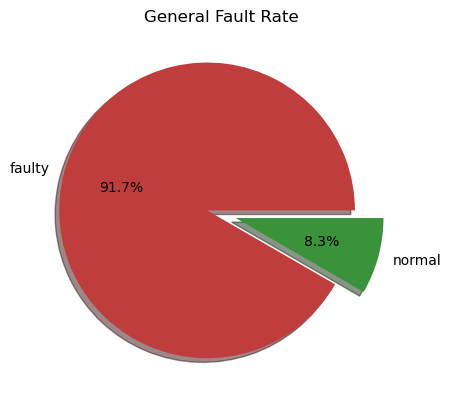

In [5]:
cmap = ["#3274a1", "#e1812c", "#3a923a", "#c03d3e", "#857aab", "#8d7866"]
plt.pie(x = no_faults, 
        explode = [0.1, 0.1],
        labels = ["faulty", "normal"],
        colors = ["#c03d3e", "#3a923a"],
        autopct = "%.1f%%", 
        shadow = True)
plt.title("General Fault Rate");

In [6]:
# Second we want to seperate ground and phase faults
gnd_faults = df["G"].value_counts()
gnd_faults

G
1    140
0    100
Name: count, dtype: int64

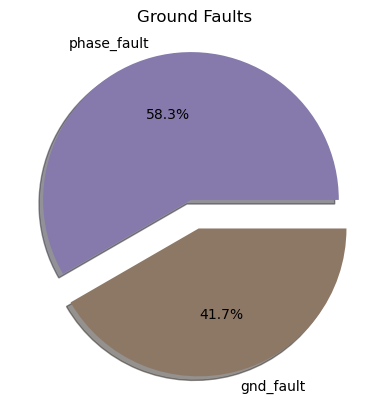

In [7]:
plt.pie(x = gnd_faults, 
        explode = [0.1, 0.1],
        labels = ["phase_fault", "gnd_fault"],
        colors = ["#857aab", "#8d7866"],
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Ground Faults");

In [8]:
# For detailed fault types we represent faults in one fault type column: FType, 
# which we will use it as a target column later.
df["FType"] = df["A"].astype("str") + df["B"].astype("str") + df["C"].astype("str") + df["G"].astype("str")
df

,No,Phase-to-phase Voltage\n(Vrms) kV,Phase angle,Frequency,Fault ground\nResistance Ω,Fault Location,MaxCoefA,MaxCoefB,MaxCoefC,MaxCoefGnd,A,B,C,G,FType
0,1,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,79893.3011,1,1,1,1,1111
1,2,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,0.0081,1,1,1,0,1110
2,3,250,0,60,0.1,Before transmission line,1.080304e+07,2.046407e+07,1.039772e+02,86421.4786,1,1,0,1,1101
3,4,250,0,60,0.1,Before transmission line,2.026137e+07,1.039772e+02,8.624428e+06,202614.0722,1,0,1,1,1011
4,5,250,0,60,0.1,Before transmission line,1.039784e+02,4.072548e+07,7.176137e+06,99363.7260,0,1,1,1,0111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,250,0,60,1.0,After transmission line,1.157232e+02,5.945955e+02,7.355252e+02,0.0104,0,1,1,0,0110
236,237,250,0,60,1.0,After transmission line,8.527806e+02,7.529230e+01,1.026836e+02,778.3837,1,0,0,1,1001
237,238,250,0,60,1.0,After transmission line,1.148692e+02,4.214921e+02,1.070680e+02,659.0750,0,1,0,1,0101
238,239,250,0,60,1.0,After transmission line,1.310678e+02,1.310679e+02,8.463774e+02,591.6231,0,0,1,1,0011


In [9]:
# Replacing fault types as given fault names for easy visualization
df["FType"][df["FType"] == "0000"] = "No Fault"
df["FType"][df["FType"] == "1001"] = "(A-G)"
df["FType"][df["FType"] == "0101"] = "(B-G)"
df["FType"][df["FType"] == "0011"] = "(C-G)"
df["FType"][df["FType"] == "1100"] = "(A-B)"
df["FType"][df["FType"] == "1010"] = "(A-C)"
df["FType"][df["FType"] == "0110"] = "(B-C)"
df["FType"][df["FType"] == "1101"] = "(A-B-G)"
df["FType"][df["FType"] == "1011"] = "(A-C-G)"
df["FType"][df["FType"] == "0111"] = "(B-C-G)"
df["FType"][df["FType"] == "1110"] = "(A-B-C)"
df["FType"][df["FType"] == "1111"] = "(A-B-C-G)"

# df['Ftype'] = df['FType']
df

C:\Users\EE-106\AppData\Local\Temp\ipykernel_24904\4063469424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FType"][df["FType"] == "0000"] = "No Fault"
C:\Users\EE-106\AppData\Local\Temp\ipykernel_24904\4063469424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FType"][df["FType"] == "1001"] = "(A-G)"
C:\Users\EE-106\AppData\Local\Temp\ipykernel_24904\4063469424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["

,No,Phase-to-phase Voltage\n(Vrms) kV,Phase angle,Frequency,Fault ground\nResistance Ω,Fault Location,MaxCoefA,MaxCoefB,MaxCoefC,MaxCoefGnd,A,B,C,G,FType
0,1,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,79893.3011,1,1,1,1,(A-B-C-G)
1,2,250,0,60,0.1,Before transmission line,1.609706e+07,4.072548e+07,1.609706e+07,0.0081,1,1,1,0,(A-B-C)
2,3,250,0,60,0.1,Before transmission line,1.080304e+07,2.046407e+07,1.039772e+02,86421.4786,1,1,0,1,(A-B-G)
3,4,250,0,60,0.1,Before transmission line,2.026137e+07,1.039772e+02,8.624428e+06,202614.0722,1,0,1,1,(A-C-G)
4,5,250,0,60,0.1,Before transmission line,1.039784e+02,4.072548e+07,7.176137e+06,99363.7260,0,1,1,1,(B-C-G)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,250,0,60,1.0,After transmission line,1.157232e+02,5.945955e+02,7.355252e+02,0.0104,0,1,1,0,(B-C)
236,237,250,0,60,1.0,After transmission line,8.527806e+02,7.529230e+01,1.026836e+02,778.3837,1,0,0,1,(A-G)
237,238,250,0,60,1.0,After transmission line,1.148692e+02,4.214921e+02,1.070680e+02,659.0750,0,1,0,1,(B-G)
238,239,250,0,60,1.0,After transmission line,1.310678e+02,1.310679e+02,8.463774e+02,591.6231,0,0,1,1,(C-G)


In [10]:
fault_types = df["FType"].value_counts()
fault_types

FType
(A-B-C-G)    20
(A-B-C)      20
(A-B-G)      20
(A-C-G)      20
(B-C-G)      20
(A-B)        20
(A-C)        20
(B-C)        20
(A-G)        20
(B-G)        20
(C-G)        20
No Fault     20
Name: count, dtype: int64

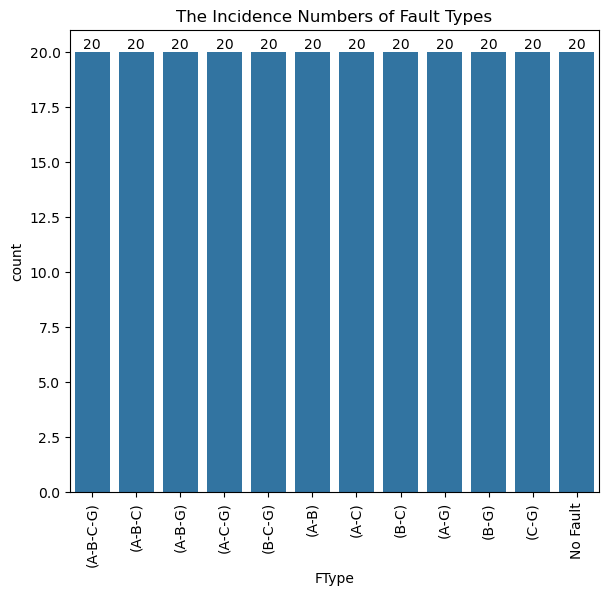

In [11]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
ax = sns.countplot(data = df, x = "FType")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title("The Incidence Numbers of Fault Types");

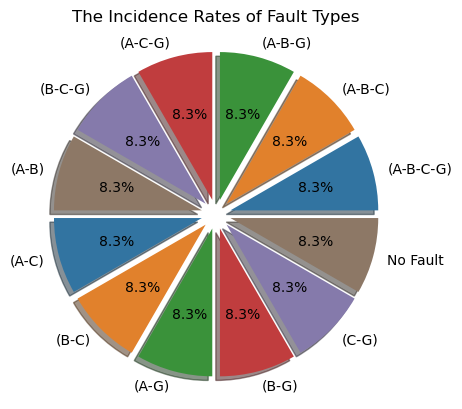

In [12]:
plt.pie(x = fault_types, 
    explode = [0.1] * len(fault_types),  # Fix: Ensure 'explode' has the same length as 'fault_types'
    labels = fault_types.index,
    colors = cmap,
    autopct = "%.1f%%", 
    shadow = True)
plt.title("The Incidence Rates of Fault Types");

#### **Section 2: Features Engineering**

1. Data Processing(Data Cleaning, Data Selection, Features Selection)
   1. Data View
   2. Data Cleaning
   3. Data Selection
   4. Data Formatting
   5. Features and Label Selection
2. Splitting
3. Scaling,Normalizing, Standard, etc
4. Tensor Initialization

In [13]:
#2.1.1-2 Data View, Data Cleaning
df.drop(["No", "Phase-to-phase Voltage\n(Vrms) kV","Phase angle", "Frequency", "Fault ground\nResistance Ω", "Fault Location"], axis=1, inplace=True)
df

,MaxCoefA,MaxCoefB,MaxCoefC,MaxCoefGnd,A,B,C,G,FType
0,1.609706e+07,4.072548e+07,1.609706e+07,79893.3011,1,1,1,1,(A-B-C-G)
1,1.609706e+07,4.072548e+07,1.609706e+07,0.0081,1,1,1,0,(A-B-C)
2,1.080304e+07,2.046407e+07,1.039772e+02,86421.4786,1,1,0,1,(A-B-G)
3,2.026137e+07,1.039772e+02,8.624428e+06,202614.0722,1,0,1,1,(A-C-G)
4,1.039784e+02,4.072548e+07,7.176137e+06,99363.7260,0,1,1,1,(B-C-G)
...,...,...,...,...,...,...,...,...,...
235,1.157232e+02,5.945955e+02,7.355252e+02,0.0104,0,1,1,0,(B-C)
236,8.527806e+02,7.529230e+01,1.026836e+02,778.3837,1,0,0,1,(A-G)
237,1.148692e+02,4.214921e+02,1.070680e+02,659.0750,0,1,0,1,(B-G)
238,1.310678e+02,1.310679e+02,8.463774e+02,591.6231,0,0,1,1,(C-G)


In [14]:
#2.1.1-2 Data View, Data Cleaning
cats=["FaultLoc","FaultA","FaultB","FaultC","FaultGnd","Ftype"]
nums=[i for i in df.columns if i not in cats]
df

,MaxCoefA,MaxCoefB,MaxCoefC,MaxCoefGnd,A,B,C,G,FType
0,1.609706e+07,4.072548e+07,1.609706e+07,79893.3011,1,1,1,1,(A-B-C-G)
1,1.609706e+07,4.072548e+07,1.609706e+07,0.0081,1,1,1,0,(A-B-C)
2,1.080304e+07,2.046407e+07,1.039772e+02,86421.4786,1,1,0,1,(A-B-G)
3,2.026137e+07,1.039772e+02,8.624428e+06,202614.0722,1,0,1,1,(A-C-G)
4,1.039784e+02,4.072548e+07,7.176137e+06,99363.7260,0,1,1,1,(B-C-G)
...,...,...,...,...,...,...,...,...,...
235,1.157232e+02,5.945955e+02,7.355252e+02,0.0104,0,1,1,0,(B-C)
236,8.527806e+02,7.529230e+01,1.026836e+02,778.3837,1,0,0,1,(A-G)
237,1.148692e+02,4.214921e+02,1.070680e+02,659.0750,0,1,0,1,(B-G)
238,1.310678e+02,1.310679e+02,8.463774e+02,591.6231,0,0,1,1,(C-G)


In [15]:
#2.1.3 Data Selection, 2.1.4 Data Formatting

# Encode categorical variables
le_FaultType = LabelEncoder()
df["FType"] = le_FaultType.fit_transform(df["FType"].values)
FaultTypeMap = dict(zip(le_FaultType.transform(le_FaultType.classes_), le_FaultType.classes_))
print("FaultType:", FaultTypeMap)
print(df.head(50))

FaultType: {0: '(A-B)', 1: '(A-B-C)', 2: '(A-B-C-G)', 3: '(A-B-G)', 4: '(A-C)', 5: '(A-C-G)', 6: '(A-G)', 7: '(B-C)', 8: '(B-C-G)', 9: '(B-G)', 10: '(C-G)', 11: 'No Fault'}
        MaxCoefA      MaxCoefB      MaxCoefC   MaxCoefGnd  A  B  C  G  FType
0   1.609706e+07  4.072548e+07  1.609706e+07   79893.3011  1  1  1  1      2
1   1.609706e+07  4.072548e+07  1.609706e+07       0.0081  1  1  1  0      1
2   1.080304e+07  2.046407e+07  1.039772e+02   86421.4786  1  1  0  1      3
3   2.026137e+07  1.039772e+02  8.624428e+06  202614.0722  1  0  1  1      5
4   1.039784e+02  4.072548e+07  7.176137e+06   99363.7260  0  1  1  1      8
5   1.079428e+07  2.036276e+07  1.039772e+02       0.0087  1  1  0  0      0
6   2.036268e+07  1.039772e+02  8.615308e+06       0.0204  1  0  1  0      4
7   1.039784e+02  4.072548e+07  7.257318e+06       0.0100  0  1  1  0      7
8   1.595690e+05  1.039772e+02  1.039772e+02  170252.9871  1  0  0  1      6
9   1.039784e+02  4.032689e+05  1.289201e+02  129747.0043

In [16]:
# Add binning column
df['bin'] = df.index // 12 + 1
print(df.to_string())

         MaxCoefA      MaxCoefB      MaxCoefC   MaxCoefGnd  A  B  C  G  FType  bin
0    1.609706e+07  4.072548e+07  1.609706e+07   79893.3011  1  1  1  1      2    1
1    1.609706e+07  4.072548e+07  1.609706e+07       0.0081  1  1  1  0      1    1
2    1.080304e+07  2.046407e+07  1.039772e+02   86421.4786  1  1  0  1      3    1
3    2.026137e+07  1.039772e+02  8.624428e+06  202614.0722  1  0  1  1      5    1
4    1.039784e+02  4.072548e+07  7.176137e+06   99363.7260  0  1  1  1      8    1
5    1.079428e+07  2.036276e+07  1.039772e+02       0.0087  1  1  0  0      0    1
6    2.036268e+07  1.039772e+02  8.615308e+06       0.0204  1  0  1  0      4    1
7    1.039784e+02  4.072548e+07  7.257318e+06       0.0100  0  1  1  0      7    1
8    1.595690e+05  1.039772e+02  1.039772e+02  170252.9871  1  0  0  1      6    1
9    1.039784e+02  4.032689e+05  1.289201e+02  129747.0043  0  1  0  1      9    1
10   1.039784e+02  1.039772e+02  1.607795e+05  403222.0644  0  0  1  1     10    1
11  

In [17]:
#2.1.5 Feature and Target Selection

In [18]:
#2.1.5 Feature and Target Selection
#2.2 Splitting the Data
# Get unique bins
bins = df['bin'].unique()

# Shuffle the bins and split into 80% for training and 20% for testing
np.random.shuffle(bins)
train_bins = bins[:int(0.8 * len(bins))]
test_bins = bins[int(0.8 * len(bins)):]

# Select the data based on the bins
train_data = df[df['bin'].isin(train_bins)]
test_data = df[df['bin'].isin(test_bins)]

# Split into X (features) and y (target)
X_train = train_data.drop(columns=['FType', 'bin'])
y_train = train_data['FType']

X_test = test_data.drop(columns=['FType', 'bin'])
y_test = test_data['FType']

# Display the results
print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

X_train:
       MaxCoefA      MaxCoefB      MaxCoefC   MaxCoefGnd  A  B  C  G
0  1.609706e+07  4.072548e+07  1.609706e+07   79893.3011  1  1  1  1
1  1.609706e+07  4.072548e+07  1.609706e+07       0.0081  1  1  1  0
2  1.080304e+07  2.046407e+07  1.039772e+02   86421.4786  1  1  0  1
3  2.026137e+07  1.039772e+02  8.624428e+06  202614.0722  1  0  1  1
4  1.039784e+02  4.072548e+07  7.176137e+06   99363.7260  0  1  1  1

X_test:
        MaxCoefA      MaxCoefB      MaxCoefC  MaxCoefGnd  A  B  C  G
60  1.609706e+07  4.072548e+07  1.609706e+07  13452.1162  1  1  1  1
61  1.609706e+07  4.072548e+07  1.609706e+07      0.0081  1  1  1  0
62  1.080132e+07  2.037972e+07  1.039772e+02  14524.9942  1  1  0  1
63  2.034572e+07  1.039772e+02  8.626015e+06  33909.5991  1  0  1  1
64  1.039784e+02  4.072548e+07  7.309908e+06  16605.2678  0  1  1  1

y_train:
0    2
1    1
2    3
3    5
4    8
Name: FType, dtype: int32

y_test:
60    2
61    1
62    3
63    5
64    8
Name: FType, dtype: int32


In [19]:
#2.3 Scaling

#### **Section 3: Create Dataset & DataLoader**

In [20]:
# #3.1 Create Dataset and DataLoader (For Pytorch)

# # Convert the data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
# x_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)

#### **Section 4 : The Architecture**

In [21]:
#4.1 Network Architectures
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(FaultTypeMap), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 12)                1548      
                                                                 
Total params: 6,060
Trainable params: 6,060
Non-trainable params: 0
_________________________________________________________________


#### **Section 5: Model Training**

1. Model Preparation
2. Model Training
3. Training History Plot

In [22]:
#5.1 Model Preparation
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
#5.2 Model Training
history = model.fit(X_train, y_train, epochs=250, batch_size=128, validation_split=0.2)

Epoch 1/250
2/2 [==============================] - 1s 254ms/step - loss: 1792141.0000 - accuracy: 0.0980 - val_loss: 108.5983 - val_accuracy: 0.0000e+00
Epoch 2/250
2/2 [==============================] - 0s 26ms/step - loss: 1380774.3750 - accuracy: 0.1242 - val_loss: 104.9707 - val_accuracy: 0.1026
Epoch 3/250
2/2 [==============================] - 0s 26ms/step - loss: 1149070.6250 - accuracy: 0.0915 - val_loss: 92.9282 - val_accuracy: 0.1026
Epoch 4/250
2/2 [==============================] - 0s 26ms/step - loss: 900299.5000 - accuracy: 0.1438 - val_loss: 80.5389 - val_accuracy: 0.1026
Epoch 5/250
2/2 [==============================] - 0s 26ms/step - loss: 715131.3750 - accuracy: 0.2810 - val_loss: 73.6298 - val_accuracy: 0.0769
Epoch 6/250
2/2 [==============================] - 0s 42ms/step - loss: 570807.6875 - accuracy: 0.3203 - val_loss: 73.4728 - val_accuracy: 0.2308
Epoch 7/250
2/2 [==============================] - 0s 26ms/step - loss: 566625.8750 - accuracy: 0.4183 - val_loss:

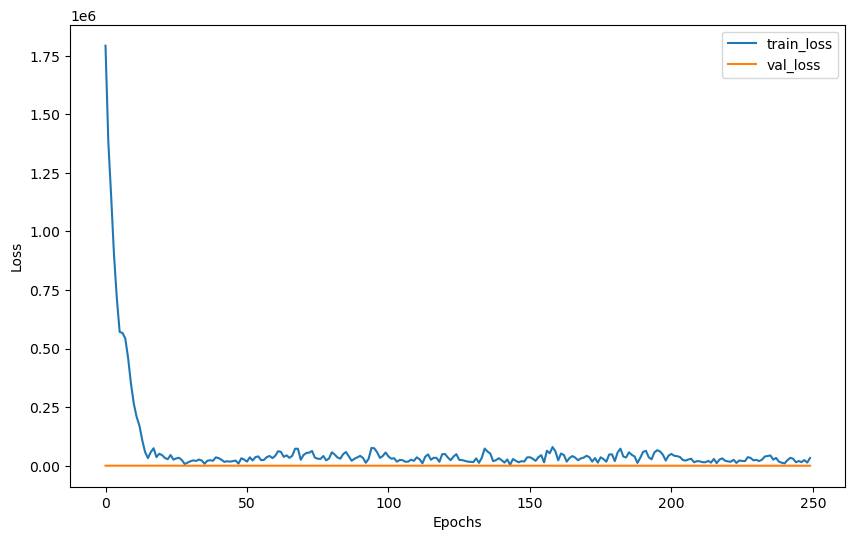

In [24]:
#5.3 History of training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **Section 6: Testing and Evaluation**

1. Make Prediction
2. Calculate Metrics Performance
3. Visualization

##### Classification Metrics

##### 1. R-Square (Coefficient of Determination)
$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$

- $y_i$: Actual values
- $\hat{y}_i$: Predicted values
- $\bar{y}$: Mean of the actual values

##### 2. Accuracy
Measures the ratio of correctly predicted instances out of the total instances:

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives
  
##### 3. Precision
Ratio of true positive predictions to the total predicted positives:

$\text{Precision} = \frac{TP}{TP + FP}$

##### 4. Recall
Ratio of true positive predictions to the total actual positives:

$\text{Recall} = \frac{TP}{TP + FN}$

##### 5. F1 Score
Harmonic mean of Precision and Recall:

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

##### Regression Metrics

##### 1. R-Square (Coefficient of Determination)
$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$

- $y_i$: Actual values
- $\hat{y}_i$: Predicted values
- $\bar{y}$: Mean of the actual values
- 
##### 2. Mean Absolute Error (MAE)
Average of the absolute differences between actual and predicted values:

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

- $n$: Number of observations

##### 3. Mean Square Error (MSE)
Average of the squared differences between actual and predicted values:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

- $n$: Number of observations

In [25]:
# 6.1 Make prediction on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


2/2 [==============================] - 0s 2ms/step


In [26]:
# 6.2 Evaluate the model

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

R2 Score: 0.666083916083916
Accuracy: 0.75
F1 Score: 0.7411375661375662


In [27]:
import pandas as pd

# Create a new DataFrame
df_result = pd.DataFrame({'X_test': X_test.values.tolist(), 'y_test': y_test, 'y_pred': y_pred})
# Display the DataFrame
df_result

,X_test,y_test,y_pred
60,"[16097055.71, 40725475.36, 16097055.71, 13452....",2,2
61,"[16097055.71, 40725475.36, 16097055.71, 0.0081...",1,2
62,"[10801323.85, 20379715.9, 103.9772, 14524.9942...",3,0
63,"[20345722.59, 103.9772, 8626015.436, 33909.599...",5,4
64,"[103.9784, 40725475.36, 7309908.092, 16605.267...",8,8
65,"[10794282.03, 20362761.11, 103.9772, 0.0087, 1...",0,0
66,"[20362677.38, 103.9772, 8615308.284, 0.0204, 1...",4,4
67,"[103.9784, 40725475.36, 7257318.231, 0.01, 0.0...",7,8
68,"[27049.5994, 103.9772, 103.9772, 28529.5409, 1...",6,6
69,"[103.9784, 67809.6263, 128.3881, 21922.229, 0....",9,9


In [28]:

#now remap again to get the original values
df_result['y_test'] = df_result['y_test'].map(FaultTypeMap)
df_result['y_pred'] = df_result['y_pred'].map(FaultTypeMap)

df_result

,X_test,y_test,y_pred
60,"[16097055.71, 40725475.36, 16097055.71, 13452....",(A-B-C-G),(A-B-C-G)
61,"[16097055.71, 40725475.36, 16097055.71, 0.0081...",(A-B-C),(A-B-C-G)
62,"[10801323.85, 20379715.9, 103.9772, 14524.9942...",(A-B-G),(A-B)
63,"[20345722.59, 103.9772, 8626015.436, 33909.599...",(A-C-G),(A-C)
64,"[103.9784, 40725475.36, 7309908.092, 16605.267...",(B-C-G),(B-C-G)
65,"[10794282.03, 20362761.11, 103.9772, 0.0087, 1...",(A-B),(A-B)
66,"[20362677.38, 103.9772, 8615308.284, 0.0204, 1...",(A-C),(A-C)
67,"[103.9784, 40725475.36, 7257318.231, 0.01, 0.0...",(B-C),(B-C-G)
68,"[27049.5994, 103.9772, 103.9772, 28529.5409, 1...",(A-G),(A-G)
69,"[103.9784, 67809.6263, 128.3881, 21922.229, 0....",(B-G),(B-G)


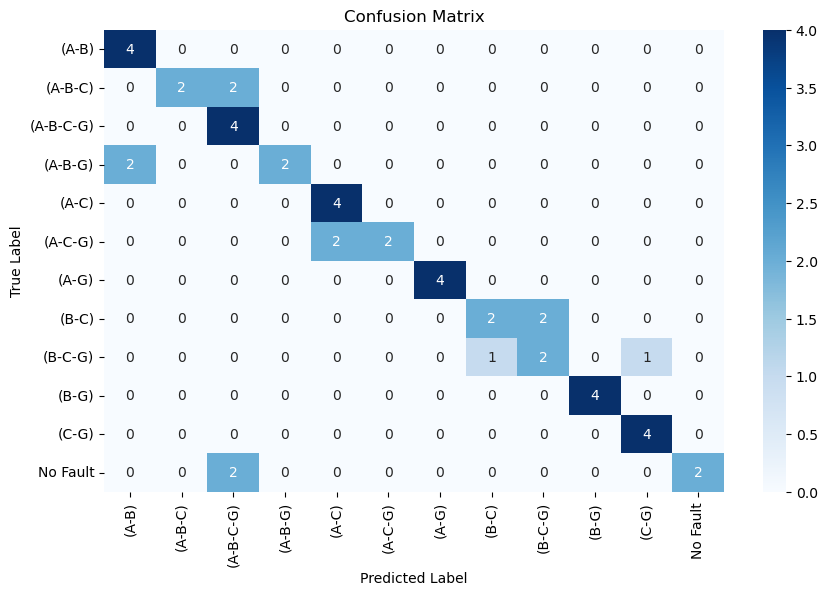

In [29]:
#6.3 Visualization
# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df_result['y_test'], df_result['y_pred']), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### **Section 7: Saving Data Prediction to CSV**